In [126]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

mnist = fetch_openml('mnist_784', as_frame= False)

/Users/sml/anaconda3/envs/EXAM_ML/lib/python3.9/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [127]:
X, y = mnist.data, mnist.target
X.shape, y.shape, type(X), type(y)

((70000, 784), (70000,), numpy.ndarray, numpy.ndarray)

In [128]:
featureDF = pd.DataFrame(X)
targetDF = pd.Series(y)

In [129]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X_train, x_test, y_train, y_test = train_test_split(featureDF,
                                                    targetDF,
                                                    stratify=targetDF,
                                                    random_state=1)
print(f'{X_train.shape}, {x_test.shape}, {y_train.shape}, {y_test.shape}')

(52500, 784), (17500, 784), (52500,), (17500,)


In [130]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_x_test = scaler.transform(x_test)

In [131]:
sgd = SGDClassifier(random_state=1, n_iter_no_change=100, alpha=0.01)
model_sgd = sgd.partial_fit(scaled_X_train, y_train, y_train.unique())

In [132]:
train_score_sgd = model_sgd.score(scaled_X_train, y_train)
test_score_sgd = model_sgd.score(scaled_x_test, y_test)

In [133]:
print(f'[Train Score] : {train_score_sgd}, [Test Score] : {test_score_sgd}')

[Train Score] : 0.8958666666666667, [Test Score] : 0.8939428571428572


In [134]:
train_score_sgd_List, test_score_sgd_List = [], []
for n in range(100):
    model_sgd = sgd.partial_fit(scaled_X_train, y_train, y_train.unique())
    train_score_sgd = model_sgd.score(scaled_X_train, y_train)
    test_score_sgd = model_sgd.score(scaled_x_test, y_test)
    print(f'{n+1}) [Train Score] : {train_score_sgd}, [Test Score] : {test_score_sgd}')

    train_score_sgd_List.append(train_score_sgd)
    test_score_sgd_List.append(test_score_sgd)


1) [Train Score] : 0.8964190476190477, [Test Score] : 0.8942285714285715
2) [Train Score] : 0.8969714285714285, [Test Score] : 0.8946285714285714
3) [Train Score] : 0.8973714285714286, [Test Score] : 0.8950857142857143
4) [Train Score] : 0.8976952380952381, [Test Score] : 0.8950285714285714
5) [Train Score] : 0.8978666666666667, [Test Score] : 0.8951428571428571
6) [Train Score] : 0.8980380952380952, [Test Score] : 0.8950857142857143
7) [Train Score] : 0.8982095238095238, [Test Score] : 0.8953714285714286
8) [Train Score] : 0.8984380952380953, [Test Score] : 0.8955428571428572
9) [Train Score] : 0.8984952380952381, [Test Score] : 0.8958285714285714
10) [Train Score] : 0.8984190476190477, [Test Score] : 0.8957714285714286
11) [Train Score] : 0.8986095238095239, [Test Score] : 0.8958285714285714
12) [Train Score] : 0.8986666666666666, [Test Score] : 0.896
13) [Train Score] : 0.8986666666666666, [Test Score] : 0.8961142857142858
14) [Train Score] : 0.8988, [Test Score] : 0.896457142857142

- 과대적합 발생 => loss='log_loss'로 변경

In [135]:
sgd = SGDClassifier(random_state=1, n_iter_no_change=100, loss='log_loss')
model_sgd = sgd.partial_fit(scaled_X_train, y_train, y_train.unique())
train_score_sgd = model_sgd.score(scaled_X_train, y_train)
test_score_sgd = model_sgd.score(scaled_x_test, y_test)
print(f'[Train Score] : {train_score_sgd}, [Test Score] : {test_score_sgd}')
train_score_sgd_List, test_score_sgd_List = [], []
for n in range(100):
    model_sgd = sgd.partial_fit(scaled_X_train, y_train, y_train.unique())
    train_score_sgd = model_sgd.score(scaled_X_train, y_train)
    test_score_sgd = model_sgd.score(scaled_x_test, y_test)
    print(f'{n + 1}) [Train Score] : {train_score_sgd}, [Test Score] : {test_score_sgd}')

    train_score_sgd_List.append(train_score_sgd)
    test_score_sgd_List.append(test_score_sgd)

[Train Score] : 0.9115238095238095, [Test Score] : 0.9077142857142857
1) [Train Score] : 0.9149714285714285, [Test Score] : 0.9098285714285714
2) [Train Score] : 0.9164761904761904, [Test Score] : 0.9110857142857143
3) [Train Score] : 0.9168380952380952, [Test Score] : 0.9113142857142857
4) [Train Score] : 0.9173142857142857, [Test Score] : 0.9113714285714286
5) [Train Score] : 0.9178857142857143, [Test Score] : 0.9117142857142857
6) [Train Score] : 0.9183238095238095, [Test Score] : 0.9122285714285714
7) [Train Score] : 0.9181904761904762, [Test Score] : 0.9132571428571429
8) [Train Score] : 0.9182666666666667, [Test Score] : 0.9129714285714285
9) [Train Score] : 0.9184, [Test Score] : 0.9129142857142857
10) [Train Score] : 0.9182857142857143, [Test Score] : 0.9134285714285715
11) [Train Score] : 0.9184, [Test Score] : 0.9135428571428571
12) [Train Score] : 0.9186285714285715, [Test Score] : 0.9132
13) [Train Score] : 0.9186285714285715, [Test Score] : 0.9133714285714286
14) [Train Sc

- 과대적합 발생 => loss 전체로 변경

hinge 1) [Train Score] : 0.916, [Test Score] : 0.909(과대적합)
hinge 2) [Train Score] : 0.916, [Test Score] : 0.911(과대적합)
hinge 3) [Train Score] : 0.917, [Test Score] : 0.911(과대적합)
hinge 4) [Train Score] : 0.917, [Test Score] : 0.911(과대적합)
hinge 5) [Train Score] : 0.918, [Test Score] : 0.912(과대적합)
hinge 6) [Train Score] : 0.918, [Test Score] : 0.913(과대적합)
hinge 7) [Train Score] : 0.918, [Test Score] : 0.913(과대적합)
hinge 8) [Train Score] : 0.918, [Test Score] : 0.913(과대적합)
hinge 9) [Train Score] : 0.919, [Test Score] : 0.913(과대적합)
hinge 10) [Train Score] : 0.919, [Test Score] : 0.913(과대적합)
log_loss 1) [Train Score] : 0.915, [Test Score] : 0.910(과대적합)
log_loss 2) [Train Score] : 0.916, [Test Score] : 0.911(과대적합)
log_loss 3) [Train Score] : 0.917, [Test Score] : 0.911(과대적합)
log_loss 4) [Train Score] : 0.917, [Test Score] : 0.911(과대적합)
log_loss 5) [Train Score] : 0.918, [Test Score] : 0.912(과대적합)
log_loss 6) [Train Score] : 0.918, [Test Score] : 0.912(과대적합)
log_loss 7) [Train Score] : 0.918, [T

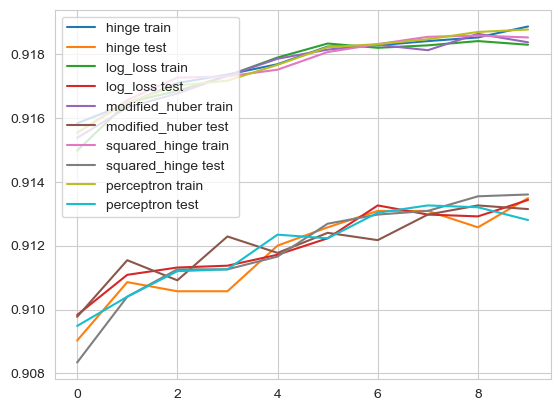

In [136]:
lossList = ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron']

for loss in lossList :
    sgd = SGDClassifier(random_state=1, n_iter_no_change=100, loss=loss)
    model_sgd = sgd.partial_fit(scaled_X_train, y_train, y_train.unique())
    train_score_sgd = model_sgd.score(scaled_X_train, y_train)
    test_score_sgd = model_sgd.score(scaled_x_test, y_test)
    # print(f'[Train Score] : {train_score_sgd}, [Test Score] : {test_score_sgd}')
    train_score_sgd_List, test_score_sgd_List = [], []
    for n in range(10):
        model_sgd = sgd.partial_fit(scaled_X_train, y_train, y_train.unique())
        train_score_sgd = model_sgd.score(scaled_X_train, y_train)
        test_score_sgd = model_sgd.score(scaled_x_test, y_test)
        print(f'{loss} {n + 1}) [Train Score] : {train_score_sgd:.3f}, [Test Score] : {test_score_sgd:.3f}', end='')
        if train_score_sgd > test_score_sgd:
            print('(과대적합)')
        else:
            print()
    
        train_score_sgd_List.append(train_score_sgd)
        test_score_sgd_List.append(test_score_sgd)
    plt.plot(train_score_sgd_List, label=loss+' train')
    plt.plot(test_score_sgd_List, label=loss+' test')
    plt.legend()
plt.show()

- alpha 값 조정

hinge 1) [Train Score] : 0.889, [Test Score] : 0.887(과대적합)
hinge 2) [Train Score] : 0.889, [Test Score] : 0.887(과대적합)
hinge 3) [Train Score] : 0.889, [Test Score] : 0.888(과대적합)
hinge 4) [Train Score] : 0.889, [Test Score] : 0.888(과대적합)
hinge 5) [Train Score] : 0.889, [Test Score] : 0.888(과대적합)
hinge 6) [Train Score] : 0.889, [Test Score] : 0.888(과대적합)
hinge 7) [Train Score] : 0.890, [Test Score] : 0.888(과대적합)
hinge 8) [Train Score] : 0.890, [Test Score] : 0.888(과대적합)
hinge 9) [Train Score] : 0.890, [Test Score] : 0.888(과대적합)
hinge 10) [Train Score] : 0.890, [Test Score] : 0.888(과대적합)
log_loss 1) [Train Score] : 0.885, [Test Score] : 0.883(과대적합)
log_loss 2) [Train Score] : 0.885, [Test Score] : 0.883(과대적합)
log_loss 3) [Train Score] : 0.885, [Test Score] : 0.884(과대적합)
log_loss 4) [Train Score] : 0.886, [Test Score] : 0.884(과대적합)
log_loss 5) [Train Score] : 0.886, [Test Score] : 0.884(과대적합)
log_loss 6) [Train Score] : 0.886, [Test Score] : 0.884(과대적합)
log_loss 7) [Train Score] : 0.886, [T

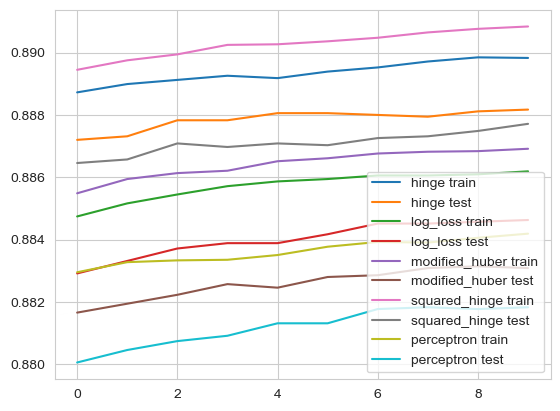

In [137]:
lossList = ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron']

for loss in lossList :
    sgd = SGDClassifier(random_state=1, n_iter_no_change=100, loss=loss, alpha=0.1)
    model_sgd = sgd.partial_fit(scaled_X_train, y_train, y_train.unique())
    train_score_sgd = model_sgd.score(scaled_X_train, y_train)
    test_score_sgd = model_sgd.score(scaled_x_test, y_test)
    # print(f'[Train Score] : {train_score_sgd}, [Test Score] : {test_score_sgd}')
    train_score_sgd_List, test_score_sgd_List = [], []
    for n in range(10):
        model_sgd = sgd.partial_fit(scaled_X_train, y_train, y_train.unique())
        train_score_sgd = model_sgd.score(scaled_X_train, y_train)
        test_score_sgd = model_sgd.score(scaled_x_test, y_test)
        print(f'{loss} {n + 1}) [Train Score] : {train_score_sgd:.3f}, [Test Score] : {test_score_sgd:.3f}', end='')
        if train_score_sgd > test_score_sgd:
            print('(과대적합)')
        else:
            print()
    
        train_score_sgd_List.append(train_score_sgd)
        test_score_sgd_List.append(test_score_sgd)
    plt.plot(train_score_sgd_List, label=loss+' train')
    plt.plot(test_score_sgd_List, label=loss+' test')
    plt.legend()
plt.show()

아차차 이진분류

hinge 1) [Train Score] : 0.969, [Test Score] : 0.968(과대적합)
hinge 2) [Train Score] : 0.970, [Test Score] : 0.968(과대적합)
hinge 3) [Train Score] : 0.970, [Test Score] : 0.968(과대적합)
hinge 4) [Train Score] : 0.971, [Test Score] : 0.969(과대적합)
hinge 5) [Train Score] : 0.971, [Test Score] : 0.969(과대적합)
hinge 6) [Train Score] : 0.971, [Test Score] : 0.969(과대적합)
hinge 7) [Train Score] : 0.971, [Test Score] : 0.969(과대적합)
hinge 8) [Train Score] : 0.971, [Test Score] : 0.969(과대적합)
hinge 9) [Train Score] : 0.971, [Test Score] : 0.969(과대적합)
hinge 10) [Train Score] : 0.971, [Test Score] : 0.969(과대적합)
log_loss 1) [Train Score] : 0.969, [Test Score] : 0.968(과대적합)
log_loss 2) [Train Score] : 0.970, [Test Score] : 0.968(과대적합)
log_loss 3) [Train Score] : 0.971, [Test Score] : 0.968(과대적합)
log_loss 4) [Train Score] : 0.971, [Test Score] : 0.969(과대적합)
log_loss 5) [Train Score] : 0.971, [Test Score] : 0.969(과대적합)
log_loss 6) [Train Score] : 0.971, [Test Score] : 0.969(과대적합)
log_loss 7) [Train Score] : 0.971, [T

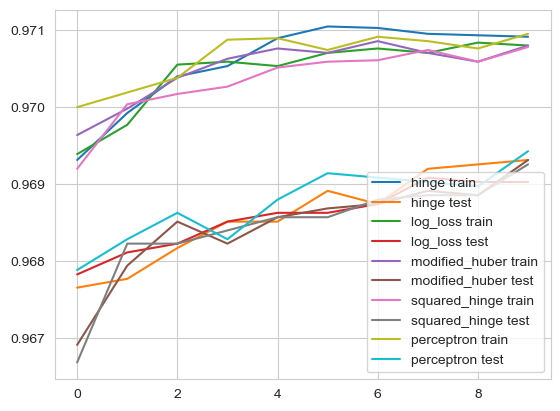

In [138]:
y_train_5 = (y_train =='5')
y_test_5 = (y_test== '5')

lossList = ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron']

for loss in lossList :
    sgd = SGDClassifier(random_state=1, n_iter_no_change=100, loss=loss)
    model_sgd = sgd.partial_fit(scaled_X_train, y_train_5, y_train_5.unique())
    train_score_sgd = model_sgd.score(scaled_X_train, y_train_5)
    test_score_sgd = model_sgd.score(scaled_x_test, y_test_5)
    # print(f'[Train Score] : {train_score_sgd}, [Test Score] : {test_score_sgd}')
    train_score_sgd_List, test_score_sgd_List = [], []
    for n in range(10):
        model_sgd = sgd.partial_fit(scaled_X_train, y_train_5, y_train_5.unique())
        train_score_sgd = model_sgd.score(scaled_X_train, y_train_5)
        test_score_sgd = model_sgd.score(scaled_x_test, y_test_5)
        print(f'{loss} {n + 1}) [Train Score] : {train_score_sgd:.3f}, [Test Score] : {test_score_sgd:.3f}', end='')
        if train_score_sgd > test_score_sgd:
            print('(과대적합)')
        else:
            print()
    
        train_score_sgd_List.append(train_score_sgd)
        test_score_sgd_List.append(test_score_sgd)
    plt.plot(train_score_sgd_List, label=loss+' train')
    plt.plot(test_score_sgd_List, label=loss+' test')
    plt.legend()
plt.show()

다시 알파값 조정

In [139]:
y_train_5 = (y_train =='5')
y_test_5 = (y_test== '5')

lossList = ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron']
aList = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
for loss in lossList :
    for al in aList :
        sgd = SGDClassifier(random_state=1, n_iter_no_change=100, loss=loss, alpha= al)
        model_sgd = sgd.partial_fit(scaled_X_train, y_train_5, y_train_5.unique())
        train_score_sgd = model_sgd.score(scaled_X_train, y_train_5)
        test_score_sgd = model_sgd.score(scaled_x_test, y_test_5)
        # print(f'[Train Score] : {train_score_sgd}, [Test Score] : {test_score_sgd}')
        train_score_sgd_List, test_score_sgd_List = [], []
        for n in range(10):
            model_sgd = sgd.partial_fit(scaled_X_train, y_train_5, y_train_5.unique())
            train_score_sgd = model_sgd.score(scaled_X_train, y_train_5)
            test_score_sgd = model_sgd.score(scaled_x_test, y_test_5)
            print(f'{loss} alpha={al} {n + 1}) [Train Score] : {train_score_sgd:.3f}, [Test Score] : {test_score_sgd:.3f}', end='')
            if train_score_sgd > test_score_sgd:
                print(' (과대적합)')
            else:
                print()
            train_score_sgd_List.append(train_score_sgd)
            test_score_sgd_List.append(test_score_sgd)
        plt.plot(train_score_sgd_List, label=loss+' train'+al)
        plt.plot(test_score_sgd_List, label=loss+' test'+al)
        plt.legend()
    plt.show()

hinge alpha=0.1 1) [Train Score] : 0.955, [Test Score] : 0.953 (과대적합)
hinge alpha=0.1 2) [Train Score] : 0.956, [Test Score] : 0.953 (과대적합)
hinge alpha=0.1 3) [Train Score] : 0.956, [Test Score] : 0.953 (과대적합)
hinge alpha=0.1 4) [Train Score] : 0.956, [Test Score] : 0.954 (과대적합)
hinge alpha=0.1 5) [Train Score] : 0.956, [Test Score] : 0.954 (과대적합)
hinge alpha=0.1 6) [Train Score] : 0.956, [Test Score] : 0.954 (과대적합)
hinge alpha=0.1 7) [Train Score] : 0.956, [Test Score] : 0.954 (과대적합)
hinge alpha=0.1 8) [Train Score] : 0.956, [Test Score] : 0.955 (과대적합)
hinge alpha=0.1 9) [Train Score] : 0.956, [Test Score] : 0.955 (과대적합)
hinge alpha=0.1 10) [Train Score] : 0.956, [Test Score] : 0.955 (과대적합)


TypeError: can only concatenate str (not "float") to str

In [ ]:
Smodel_pre_5 = model_sgd.predict(scaled_x_test)


In [147]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report


In [148]:
from sklearn.linear_model import LogisticRegression

model_logi = LogisticRegression(solver='liblinear')
model_logi.fit(scaled_X_train, y_train_5)

train_score_logi = model_logi.score(scaled_X_train, y_train_5)
test_score_logi = model_logi.score(scaled_x_test, y_test_5)
print(f'[Train Score] : {train_score_logi:.3f}, [Test Score] : {test_score_logi:.3f}', end='')
if train_score_sgd > test_score_sgd:
    print(' (과대적합)')
else:
    print()

[Train Score] : 0.979, [Test Score] : 0.975 (과대적합)


In [153]:
Smodel_pre_5 = model_sgd.predict(scaled_x_test)
Lmodel_pre_5 = model_logi.predict(scaled_x_test)


In [157]:
print(classification_report(y_test_5, Smodel_pre_5))

              precision    recall  f1-score   support

       False       0.96      1.00      0.98     15922
        True       0.92      0.54      0.68      1578

    accuracy                           0.95     17500
   macro avg       0.94      0.77      0.83     17500
weighted avg       0.95      0.95      0.95     17500


In [158]:
print(classification_report(y_test_5, Lmodel_pre_5))


              precision    recall  f1-score   support

       False       0.98      0.99      0.99     15922
        True       0.89      0.82      0.86      1578

    accuracy                           0.97     17500
   macro avg       0.94      0.91      0.92     17500
weighted avg       0.97      0.97      0.97     17500


# 이하 이미지가 안 불러와짐....

In [140]:
jpg5 = '5.jpg'
png5 = '5.png'

import cv2

cv5 = cv2.imread(jpg5, cv2.IMREAD_GRAYSCALE)
cv5

Smodel_pre_5 = model_sgd.predict(cv5)
accuracy_score(y_test_5, Smodel_pre_5)


ValueError: X has 28 features, but SGDClassifier is expecting 784 features as input.

In [141]:
# 내가 그린 데이터도 확인하기 
import cv2
my_num = cv2.imread(jpg5, cv2.IMREAD_GRAYSCALE)
my_num = cv2.resize(my_num, (28, 28))

my_num = my_num.ravel()
my_num = abs(my_num.astype("int") - 255) # 이미지는 흰부분이 255라서 

Smodel_pre_5 = model_sgd.predict([my_num])
accuracy_score(y_test_5, Smodel_pre_5)

ValueError: Found input variables with inconsistent numbers of samples: [17500, 1]